# DESAFIO SÉRIES TEMPORAIS

### Objetivo:

Criar um modelo de Séries Temporais Históricas a partir da base de dados pública Daibetes, que pode ser encontrada nesta URL: http://archive.ics.uci.edu/ml/datasets/Diabetes

### Necessidade:

O modelo de Séries Temporaris em Python foi desenvolvido considerando os critérios abaixo:

•	Explicar o porque escolheu o algoritmo de Séries Temporais usado (e porque não usou outros);<br/>
•	Receber as entradas específicas (escolher as variáveis pertinentes);<br/>
•	Justificar a escolha das variáveis;<br/>
•	Justificar a performance do modelo de séries temporais, com base nos métodos de avaliação pertinentes;<br/>

In [572]:
import numpy as np
import pandas as pd
import os
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
sns.set()
%matplotlib inline

In [472]:
# Montando dataframe com dados de Diabetes
data_home = "C:\\Users\\felipe.simione\\Desktop\\Lambda3\\DESAFIO10\\data\\"
df_total = pd.DataFrame(columns=['date','time','code','value'])
for i in range(70):
    # Carregamento de todos os dados da atividade especificada
    file_names = [filename for filename in os.listdir(data_home)]
    walk_file = data_home + file_names[i]
    df = pd.read_csv(walk_file, names = ['date','time','code','value'], sep='\t')
    df_total = df_total.append(df)

In [496]:
# Exportando os dados para tratar data no excel
df_total.to_csv('tratar_dados.csv')

In [718]:
df_total = pd.read_csv('data.csv',  sep=';')

In [719]:
df_total['value'] = df_total['value'].apply(lambda x: x.str.strip() if type(x) == 'object' else x)

In [720]:
df_total['value'] = pd.to_numeric(df_total['value'], errors='coerce')
df_total['date'] = pd.to_datetime(df_total['date'], format="%Y-%m-%d")#.dt.to_period('M')
df_total['year_month'] = df_total['date'] + pd.offsets.MonthBegin(-1)

In [858]:
# Deletando os dados NaN
df_total.dropna(axis=0, subset=['date'], inplace=True)

In [859]:
# Ordendando os dados por date/time
df_total.sort_values(['year_month','time'], ascending=True, inplace=True)

A análise será feita somente para o code "NPH insulin dose"

In [899]:
# Preparando dados para análise mes/ano
df_code = df_total.query('code == 34')[['year_month','value']]
df_code = df_code.groupby(['year_month'])['value'].sum().to_frame().reset_index()
df_code.sort_values(['year_month'], ascending=True, inplace=True)

In [900]:
# Indexando mes/ano para gráfico
df_code_graf = df_code.set_index('year_month')

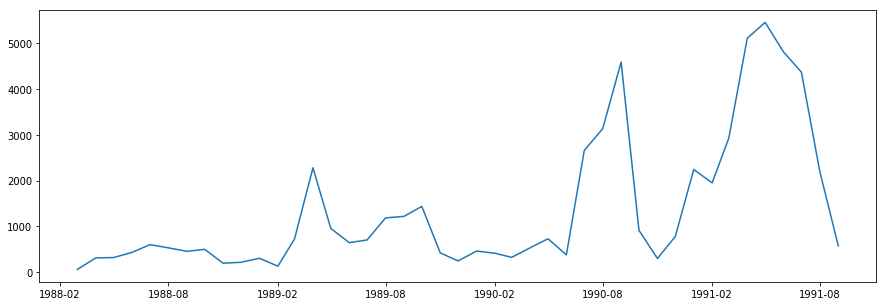

In [901]:
# Plotando gráfico
plt.figure(figsize=(15,5))
plt.plot(df_code_graf)

In [902]:
df_code.describe()

,value
count,43.000000
mean,1366.418605
std,1510.945403
min,60.000000
25%,397.000000
50%,646.000000
75%,2074.500000
max,5459.000000


In [941]:
# Implementando o modelo ARIMA
from statsmodels.tsa.arima_model import ARIMA
from random import random
# obtendo os dados
data = df_code['value'].iloc[:-8].values
# fit modelo
model = ARIMA(data, order=(0, 1, 0))
model_fit = model.fit(disp=False)
# Fazendo predição e imprimindo
yhat = model_fit.predict(len(data), len(data), typ='levels')
print(yhat)

[2307.20588235]


In [942]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                   34
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -281.066
Method:                           css   S.D. of innovations            941.734
Date:                Sat, 27 Oct 2018   AIC                            566.133
Time:                        16:26:30   BIC                            569.186
Sample:                             1   HQIC                           567.174
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.2059    161.506      0.398      0.694    -252.340     380.752
==============================================================================
"""

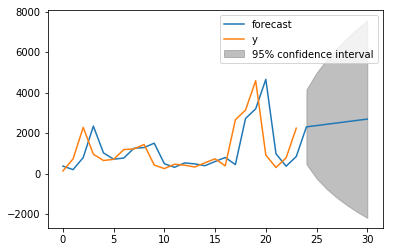

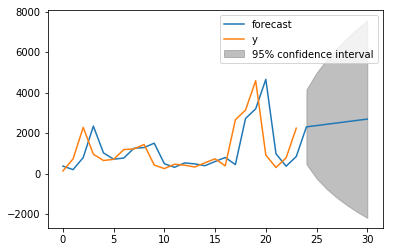

In [943]:
# Plotando um gráfico com previsão e demanda real
model_fit.plot_predict(len(data)-24, len(data)+6)

In [911]:
# Implementando o modelo SARIMAX
from statsmodels.tsa.statespace.sarimax import SARIMAX
from random import random
# Obtendo dados
data = df_code['value'].iloc[:-8].values
# fit modelo
model = SARIMAX(data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 1))
model_fit = model.fit(disp=False)
# Fazendo a predição
yhat = model_fit.predict(len(data), len(data))
print(yhat)

[2109.24516326]


In [912]:
#  Implementando o modelo SES
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from random import random
# Obtendo dados
data = df_code['value'].iloc[:-8].values
# fit modelo
model = SimpleExpSmoothing(data)
model_fit = model.fit()
# Fazendo a predição
yhat = model_fit.predict(len(data), len(data))
print(yhat)

[1877.01631532]


In [913]:
# Implementando o modelo HWES
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from random import random
# Obtendo dados
data = df_code['value'].iloc[:-6].values
# fit modelo
model = ExponentialSmoothing(data)
model_fit = model.fit()
# Fazendo a predição
yhat = model_fit.predict(len(data), len(data))
print(yhat)

[2744.70175516]


In [914]:
# Valor real do mês seguinte a previsão
df_code['value'].iloc[-8:-7]

35    1952.0
Name: value, dtype: float64

# Conclusão

### Escolha do modelo:

Foram implentados alguns modelos para teste e o ARIMA foi o que obteve melhores resultados neste caso.

### Variáveis:

Algumas variações de ordem foram testadas chegando ao resultado de (0,1,0) para este caso.

### Resultado:

Os modelos de séries temporais precisam ser bem trabalhados e analisados, para isso precisamos obter o máximo de informações de como cada modelo funciona e suas variáveis, além disso efetuar uma análise exploratória mais aprofundada.

Nesta aplicação não trabalhamos de forma aprofundada, assim só implementamos os modelos e outputs. Em um proximo passo precisamos enteder todos os aspectos e necessidades para uma melhor aplicação.
